### t-SNE is unsupervised learning algorithm.

In [1]:
import matplotlib.pyplot as plt #for plotting
import numpy as np #handling numerical arrays
import pandas as pd #to create dataframes from numerical arrays
import seaborn as sns #for plotting

from sklearn import datasets,manifold #get data and perform t-SNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = datasets.fetch_openml(
    'mnist_784' ,
    version = 1,
    return_X_y = True
    )

pixel_values, targets = data
targets = targets.astype(int) #convert from string to integers

In [3]:
print("Shape of pixel_values: ",pixel_values.shape) #its is 2d array of shape 70000 X 784
#there are 70k images of 28X28 size, flattening images gives an vector of length 784

Shape of pixel_values:  (70000, 784)


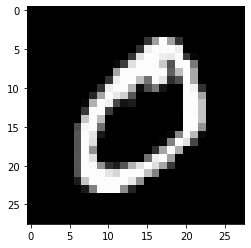

In [4]:
#visualizing the image by reshaping the data
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')
plt.show()

In [5]:
#create t-SNE formation. We use only 2 components for visulaization
# we use 3000 images for tsne
%%time
tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

CPU times: user 58 s, sys: 114 ms, total: 58.1 s
Wall time: 36.7 s


In [6]:
#here we are creating a pandas df from np array. This df consists of 3 cols viz., i,j and targets. 
#i and j are the two components from tsnedecomposition and target is actual class label

tsne_df = pd.DataFrame(
    np.column_stack((transformed_data,targets[:3000])),
    columns = ["i","j","targets"]
)

tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)
tsne_df.head(10)

,i,j,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
5,63.997231,-1.102326,2
6,-6.551701,9.943600,1
7,20.086042,-44.003902,3
8,-0.806248,12.682267,1
9,-1.481194,45.506077,4


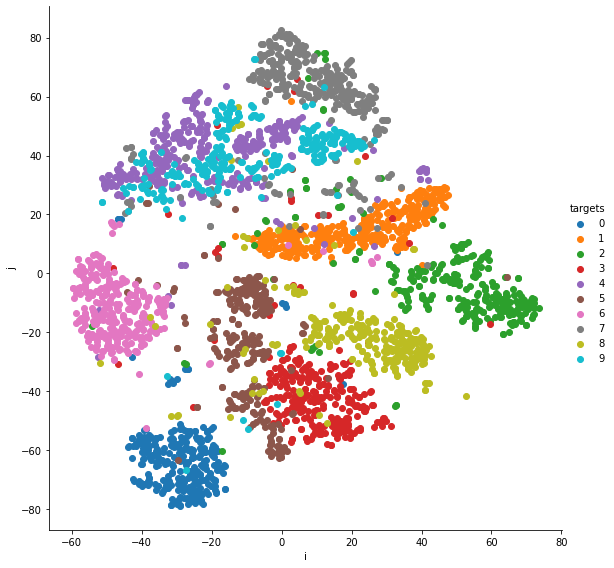

In [7]:
#plotting tsne components using seaborn and matplotlib
grid = sns.FacetGrid(tsne_df,hue="targets",height=8)
grid.map(plt.scatter,"i","j").add_legend()
plt.show()